## Homework 5 - Mathplotlib - Michelle Rocío García Sánchez (a00226577)
## BootCampSpot 



In [45]:
#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

#Inference 1: By plotting the regression line for the capomulin regimen, I found there is a a positive correlation that indicates that tumor size increases when a mouse increases in weight, according to the study results.
#Inference 2: It's nice that the researchers tried to maintain a fair distribution of male and female mice, there are 50.7% males and 49.3% females participating in the study, according to the pie plot using pyplot.
#Inference 3: Stelasyn has the highest tumor volume in comparison to the other 3 regimen's if we take into consideration it's average and it's third quartil.

In [2]:
# Importing necessary dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Setting path for csv files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Using pandas.read_csv to convert mouse data and study results csv's into dataframes
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#printing mouse and study dataframes 
print(mouse_metadata)
print(study_results)



    Mouse_ID Drug_Regimen     Sex  Age_months  Weight_g
0       k403     Ramicane    Male          21        16
1       s185    Capomulin  Female           3        17
2       x401    Capomulin  Female          16        15
3       m601    Capomulin    Male          22        17
4       g791     Ramicane    Male          11        16
..       ...          ...     ...         ...       ...
244     z314     Stelasyn  Female          21        28
245     z435     Propriva  Female          12        26
246     z581    Infubinol  Female          24        25
247     z795     Naftisol  Female          13        29
248     z969     Naftisol    Male           9        30

[249 rows x 5 columns]
     Mouse_ID  Timepoint  Tumor_Volume_mm3  Metastatic_Sites
0        b128          0         45.000000                 0
1        f932          0         45.000000                 0
2        g107          0         45.000000                 0
3        a457          0         45.000000                 0

In [3]:
# Using pandas.DataFrame.merge to combine the data into a single dataset, centering on Mouse_ID so we can later find duplicate mouse Id's.
results_merged=mouse_metadata.merge(study_results, on="Mouse_ID")
print(results_merged)

     Mouse_ID Drug_Regimen   Sex  Age_months  Weight_g  Timepoint  \
0        k403     Ramicane  Male          21        16          0   
1        k403     Ramicane  Male          21        16          5   
2        k403     Ramicane  Male          21        16         10   
3        k403     Ramicane  Male          21        16         15   
4        k403     Ramicane  Male          21        16         20   
...       ...          ...   ...         ...       ...        ...   
1888     z969     Naftisol  Male           9        30         25   
1889     z969     Naftisol  Male           9        30         30   
1890     z969     Naftisol  Male           9        30         35   
1891     z969     Naftisol  Male           9        30         40   
1892     z969     Naftisol  Male           9        30         45   

      Tumor_Volume_mm3  Metastatic_Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  

In [16]:
#counting the number of unique mice ID in the results_merged dataframe
unique_id=results_merged.Mouse_ID.unique()

print(len(unique_id))


249


In [17]:
# Figuring out which mouse Id's have duplicates by focusing on Mouse ID and Timepoint. 
duplicateRowsTotal = results_merged[results_merged.duplicated()]
print(duplicateRowsTotal)
# printing all of the duplicate mouse ID's in the dataframe results_merged
duplicate_mouse_ID_timepoint=results_merged[results_merged.duplicated(["Mouse_ID", "Timepoint"])]
print(duplicate_mouse_ID_timepoint)

    Mouse_ID Drug_Regimen     Sex  Age_months  Weight_g  Timepoint  \
909     g989     Propriva  Female          21        26          0   

     Tumor_Volume_mm3  Metastatic_Sites  
909              45.0                 0  
    Mouse_ID Drug_Regimen     Sex  Age_months  Weight_g  Timepoint  \
909     g989     Propriva  Female          21        26          0   
911     g989     Propriva  Female          21        26          5   
913     g989     Propriva  Female          21        26         10   
915     g989     Propriva  Female          21        26         15   
917     g989     Propriva  Female          21        26         20   

     Tumor_Volume_mm3  Metastatic_Sites  
909         45.000000                 0  
911         47.570392                 0  
913         49.880528                 0  
915         53.442020                 0  
917         54.657650                 1  


In [18]:
#creating an numpy array of the duplicate mouse_id's.
array_results=np.array(results_merged)
print(array_results[910])
print(array_results[909])
print(array_results[908])
print(array_results[907])
print(array_results[912])

['g989' 'Propriva' 'Female' 21 26 5 48.78680146 0]
['g989' 'Propriva' 'Female' 21 26 0 45.0 0]
['g989' 'Propriva' 'Female' 21 26 0 45.0 0]
['g867' 'Stelasyn' 'Female' 9 25 15 51.06041924 1]
['g989' 'Propriva' 'Female' 21 26 10 51.74515613 0]


In [19]:
# Creating a clean DataFrame by dropping duplicate mouse ID's using "Mouse_ID" and "Timepoint" as reference.
results_merged_unique=results_merged.drop_duplicates(subset=["Mouse_ID", "Timepoint"], keep='first', inplace=False)
print(results_merged_unique)

     Mouse_ID Drug_Regimen   Sex  Age_months  Weight_g  Timepoint  \
0        k403     Ramicane  Male          21        16          0   
1        k403     Ramicane  Male          21        16          5   
2        k403     Ramicane  Male          21        16         10   
3        k403     Ramicane  Male          21        16         15   
4        k403     Ramicane  Male          21        16         20   
...       ...          ...   ...         ...       ...        ...   
1888     z969     Naftisol  Male           9        30         25   
1889     z969     Naftisol  Male           9        30         30   
1890     z969     Naftisol  Male           9        30         35   
1891     z969     Naftisol  Male           9        30         40   
1892     z969     Naftisol  Male           9        30         45   

      Tumor_Volume_mm3  Metastatic_Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  

In [22]:
# Checking the number of mice in the clean DataFrame, originally there were 1893 mouse Id's
mice_array=np.array(results_merged_unique)
print(len(mice_array))


1888


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

mean_tumor=results_merged_unique.mean(axis=0, skipna=None, level=None, numeric_only=None)  
#print(type(mean_tumor))
print(mean_tumor["Tumor_Volume_mm3"])

median_tumor=results_merged_unique.median(axis=0, skipna=None, level=None, numeric_only=None) 
print(median_tumor["Tumor_Volume_mm3"])

variance_tumor=results_merged_unique.var(axis=0, skipna=None, level=None, numeric_only=None) 
print(variance_tumor["Tumor_Volume_mm3"])

std_dev_tumor=results_merged_unique.std(axis=0, skipna=None, level=None, numeric_only=None) 
print(std_dev_tumor["Tumor_Volume_mm3"])

std_error_tumor=results_merged_unique.sem(axis=0, skipna=None, level=None, numeric_only=None) 
print(std_error_tumor["Tumor_Volume_mm3"])


50.44927645413136
48.951421075
79.29127745388115
8.904564978362567
0.2049329125626728


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

data = {'Mean':[mean_tumor["Tumor_Volume_mm3"]], 'Median':[median_tumor["Tumor_Volume_mm3"]], 'Variance':[variance_tumor["Tumor_Volume_mm3"]], 'StdDev':[std_dev_tumor["Tumor_Volume_mm3"]], 'StdError':[std_error_tumor["Tumor_Volume_mm3"]]} 
  
# Creates pandas DataFrame. 
Summary_Statistics = pd.DataFrame(data, index =(['Summary_Statistics']))

# print the data 
Summary_Statistics

,Mean,Median,Variance,StdDev,StdError
Summary_Statistics,50.449276,48.951421,79.291277,8.904565,0.204933


## Bar Plots

           Mouse_ID  Drug_Regimen  Sex  Age_months  Weight_g  \
Timepoint                                                      
0               249           249  249         249       249   
5               237           237  237         237       237   
10              222           222  222         222       222   
15              206           206  206         206       206   
20              194           194  194         194       194   
25              183           183  183         183       183   
30              171           171  171         171       171   
35              154           154  154         154       154   
40              142           142  142         142       142   
45              130           130  130         130       130   

           Tumor_Volume_mm3  Metastatic_Sites  
Timepoint                                      
0                       249               249  
5                       237               237  
10                      222            

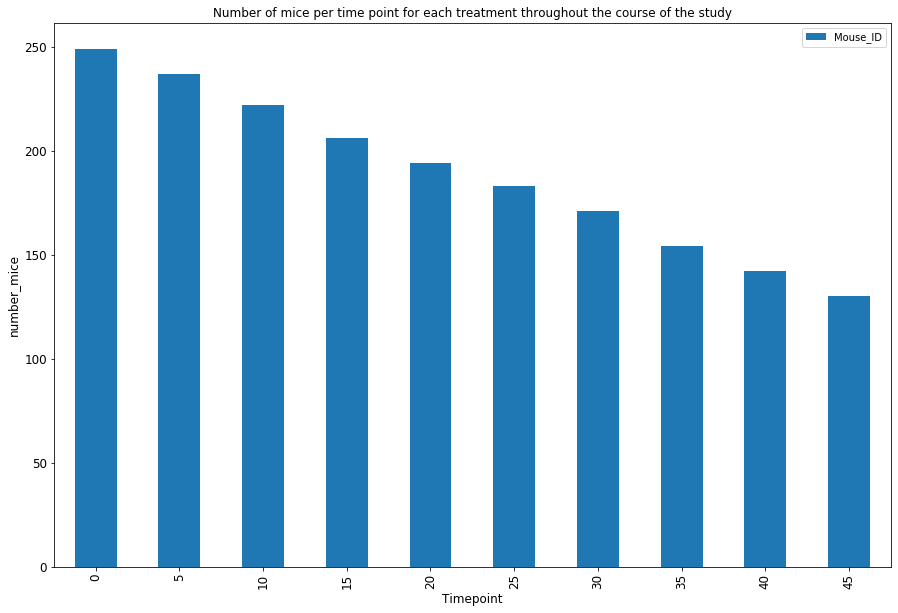

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#number of mice per time point
number_mice=results_merged_unique.groupby('Timepoint').count()
print(number_mice)
#creation of bar plot
ax = number_mice[['Mouse_ID']].plot(kind='bar', title ="Number of mice per time point for each treatment throughout the course of the study", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Timepoint", fontsize=12)
ax.set_ylabel("number_mice", fontsize=12)
plt.show()


              Mouse_ID  Sex  Age_months  Weight_g  Timepoint  \
Drug_Regimen                                                   
Capomulin          230  230         230       230        230   
Ceftamin           178  178         178       178        178   
Infubinol          178  178         178       178        178   
Ketapril           188  188         188       188        188   
Naftisol           186  186         186       186        186   
Placebo            181  181         181       181        181   
Propriva           156  156         156       156        156   
Ramicane           228  228         228       228        228   
Stelasyn           181  181         181       181        181   
Zoniferol          182  182         182       182        182   

              Tumor_Volume_mm3  Metastatic_Sites  
Drug_Regimen                                      
Capomulin                  230               230  
Ceftamin                   178               178  
Infubinol                  

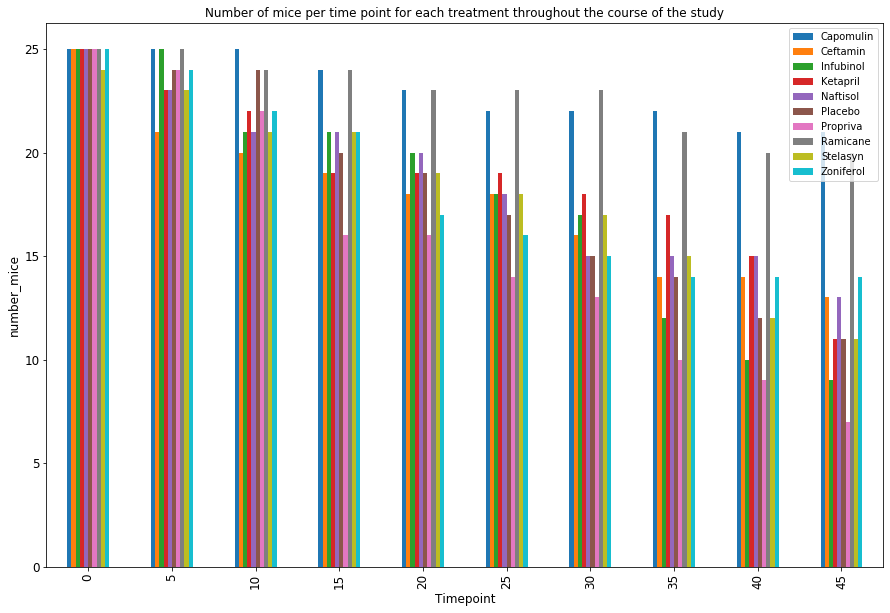

In [27]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#creation of bar plot
number_treatment=results_merged_unique.groupby('Drug_Regimen').count()
print(number_treatment)
Drug_Capomulin = results_merged_unique[results_merged_unique['Drug_Regimen'] == "Capomulin"]
#print(Drug_Capomulin)
Capomulin=Drug_Capomulin.groupby('Timepoint').count()
#print(Capomulin['Mouse_ID'])

Drug_Ceftamin = results_merged_unique[results_merged_unique['Drug_Regimen'] == "Ceftamin"]
#print(Drug_Ceftamin)
Ceftamin=Drug_Ceftamin.groupby('Timepoint').count()
#print(Ceftamin['Mouse_ID'])

#creation of new DF
drug = pd.concat([Capomulin["Mouse_ID"],  Ceftamin["Age_months"]], axis=1, sort=False)

drug = drug.rename(columns={'Mouse_ID': 'Capomulin'})
drug = drug.rename(columns={'Age_months': 'Ceftamin'})

Drug_Infubinol = results_merged_unique[results_merged_unique["Drug_Regimen"]== "Infubinol"]
Infubinol = Drug_Infubinol.groupby("Timepoint").count()
drug = pd.concat([drug, Infubinol["Mouse_ID"]],axis=1,sort=False)
drug=drug.rename(columns={'Mouse_ID':'Infubinol'})

Drug_Ketapril = results_merged_unique[results_merged_unique["Drug_Regimen"]== "Ketapril"]
Ketapril = Drug_Ketapril.groupby("Timepoint").count()
drug = pd.concat([drug, Ketapril["Mouse_ID"]],axis=1,sort=False)
drug=drug.rename(columns={'Mouse_ID':'Ketapril'})

Drug_Naftisol = results_merged_unique[results_merged_unique["Drug_Regimen"]== "Naftisol"]
Naftisol = Drug_Naftisol.groupby("Timepoint").count()
drug = pd.concat([drug, Naftisol["Mouse_ID"]],axis=1,sort=False)
drug=drug.rename(columns={'Mouse_ID':'Naftisol'})

Drug_Placebo = results_merged_unique[results_merged_unique["Drug_Regimen"]== "Placebo"]
Placebo = Drug_Placebo.groupby("Timepoint").count()
drug = pd.concat([drug, Placebo["Mouse_ID"]],axis=1,sort=False)
drug=drug.rename(columns={'Mouse_ID':'Placebo'})

Drug_Propriva = results_merged_unique[results_merged_unique["Drug_Regimen"]== "Propriva"]
Propriva = Drug_Propriva.groupby("Timepoint").count()
drug = pd.concat([drug, Propriva["Mouse_ID"]],axis=1,sort=False)
drug=drug.rename(columns={'Mouse_ID':'Propriva'})

Drug_Ramicane = results_merged_unique[results_merged_unique["Drug_Regimen"]== "Ramicane"]
Ramicane = Drug_Ramicane.groupby("Timepoint").count()
drug = pd.concat([drug, Ramicane["Mouse_ID"]],axis=1,sort=False)
drug=drug.rename(columns={'Mouse_ID':'Ramicane'})

Drug_Stelasyn = results_merged_unique[results_merged_unique["Drug_Regimen"]== "Stelasyn"]
Stelasyn = Drug_Stelasyn.groupby("Timepoint").count()
drug = pd.concat([drug, Stelasyn["Mouse_ID"]],axis=1,sort=False)
drug=drug.rename(columns={'Mouse_ID':'Stelasyn'})

Drug_Zoniferol= results_merged_unique[results_merged_unique["Drug_Regimen"]== "Zoniferol"]
Zoniferol= Drug_Zoniferol.groupby("Timepoint").count()
drug= pd.concat([drug, Zoniferol["Mouse_ID"]],axis=1,sort=False)
drug=drug.rename(columns={'Mouse_ID':'Zoniferol'})


print(drug)
#creation of pyplot with counter of mice per drug regimen filtered by timepoint
ax = drug[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']].plot(kind='bar', title ="Number of mice per time point for each treatment throughout the course of the study", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Timepoint", fontsize=12)
ax.set_ylabel("number_mice", fontsize=12)
plt.show()


## Pie Plots

     Mouse_ID Drug_Regimen   Sex  Age_months  Weight_g  Timepoint  \
0        k403     Ramicane  Male          21        16          0   
1        k403     Ramicane  Male          21        16          5   
2        k403     Ramicane  Male          21        16         10   
3        k403     Ramicane  Male          21        16         15   
4        k403     Ramicane  Male          21        16         20   
...       ...          ...   ...         ...       ...        ...   
1888     z969     Naftisol  Male           9        30         25   
1889     z969     Naftisol  Male           9        30         30   
1890     z969     Naftisol  Male           9        30         35   
1891     z969     Naftisol  Male           9        30         40   
1892     z969     Naftisol  Male           9        30         45   

      Tumor_Volume_mm3  Metastatic_Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  

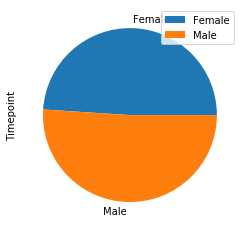

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas 
results_merged_unique.groupby(['Sex']).sum().plot(kind='pie', y='Timepoint')

#print(results_merged_unique)
Male_mice = results_merged_unique[results_merged_unique["Sex"]== "Male"]
print(Male_mice)

Male_mice_array=np.array(Male_mice)
print(len(Male_mice_array))

#female mice
Female_mice = results_merged_unique[results_merged_unique["Sex"]== "Female"]
print(Female_mice)

Female_mice_array=np.array(Female_mice)
print(len(Female_mice_array))



[958, 930]


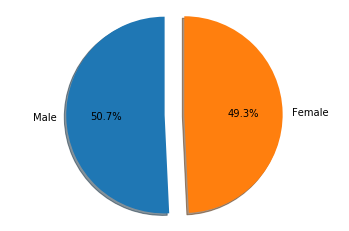

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels='Male', 'Female'
sizes=[len(Male_mice_array), len(Female_mice_array)]
print(sizes)
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


#Counting all the unique mouse Id's
Mouse_ID=results_merged_unique["Mouse_ID"].unique()
#print(len(Mouse_ID))

#new array datos_tumores
datos_tumores=[]

#for loop for unique Id's
for m_id in Mouse_ID:
    mouse=results_merged_unique[results_merged_unique["Mouse_ID"]== m_id]
    #filtering data frame "mouse" to obtain number of tumors
    regimen=mouse["Drug_Regimen"].unique()[0]
    tumors=mouse["Tumor_Volume_mm3"]
    tumors=np.array(tumors)
    pesos=np.array(mouse["Weight_g"])
    peso=sum(pesos)/len(pesos)
    #calculating average tumor size
    promedio_tumors=sum(tumors)/len(tumors)
    #sorting tumors by smallest to biggest
    tumors.sort()
    #Q1= value that represents 25% of the data
    Q1=np.percentile(tumors, 25, interpolation = 'midpoint')
    #Q3=value that represents 75% of the data
    Q3=np.percentile(tumors, 75, interpolation = 'midpoint')
    #Obtaining intercuartil range
    riq=Q3-Q1
    #outliers counter
    outliers=0
    for t in tumors:
        if (t<Q1-1.5*riq or t>Q3+1.5*riq):
            outliers+=1
    datos_tumores.append([m_id, promedio_tumors, riq, outliers, regimen, peso])

#Deploy rows of the matrix datos_tumores
#for d in datos_tumores:
    #print(d)

#convert matrix into a dataframe
tumors_dataframe = pd.DataFrame(data=datos_tumores, index=None, columns=["Mouse_ID","Prom_Tumor","IQR","Outliers","Regimen", "Weight"])
print(tumors_dataframe)
    

    

    
    




    Mouse_ID  Prom_Tumor        IQR  Outliers    Regimen  Weight
0       k403   32.358859   5.795886         1   Ramicane    16.0
1       s185   34.559143   7.251989         0  Capomulin    17.0
2       x401   36.182040   7.884012         0  Capomulin    15.0
3       m601   34.847470   4.576829         1  Capomulin    17.0
4       g791   37.489237   7.784018         0   Ramicane    16.0
..       ...         ...        ...       ...        ...     ...
244     z314   45.467356   0.000000         2   Stelasyn    28.0
245     z435   46.942214   1.855331         0   Propriva    26.0
246     z581   53.979584   6.620047         0  Infubinol    25.0
247     z795   54.880317  11.413177         0   Naftisol    29.0
248     z969   60.194652  13.824086         0   Naftisol    30.0

[249 rows x 6 columns]


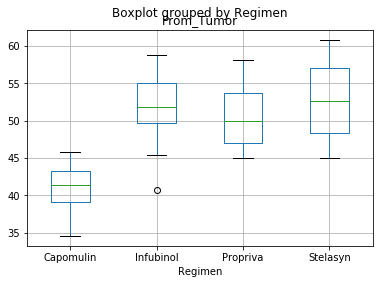

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#filtering regimens of tumors_dataframe 
selected_Regimens = tumors_dataframe[(tumors_dataframe["Regimen"]=="Capomulin")|(tumors_dataframe["Regimen"]=="Stelasyn")|(tumors_dataframe["Regimen"]=="Propriva") | (tumors_dataframe["Regimen"]=="Infubinol")]

boxplot=selected_Regimens.boxplot(column=['Prom_Tumor'], by='Regimen')

## Line and Scatter Plots

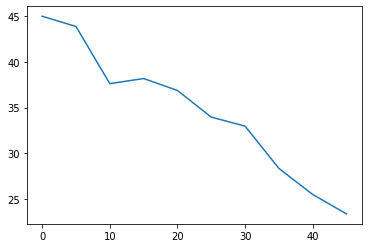

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capo_mouse= results_merged[results_merged["Drug_Regimen"]== "Capomulin"]
#print(capo_mouse)

mouse_s185=capo_mouse[capo_mouse["Mouse_ID"]=="s185"]
#print(mouse_s185)

timepoint_line = mouse_s185['Timepoint']

timepoint_line= np.array(timepoint_line)
#print(timepoint_line)

tumor_line = mouse_s185['Tumor_Volume_mm3']

tumor_line= np.array(tumor_line)
#print(tumor_line)

plt.plot(timepoint_line, tumor_line)




[17. 15. 17. 17. 17. 17. 17. 19. 17. 20. 21. 19. 19. 21. 22. 21. 23. 23.
 21. 22. 23. 21. 25. 24. 25.]
[34.55914339 36.18203956 34.8474699  36.50597276 39.88749519 38.50682925
 36.50921205 39.04981645 39.3287251  39.14105275 41.35245228 41.99009661
 42.50726104 40.0836993  41.96363563 43.21692461 44.46523635 41.38482521
 41.5815951  44.6133439  42.80373304 44.43447379 43.36736445 44.80580968
 45.79896951]


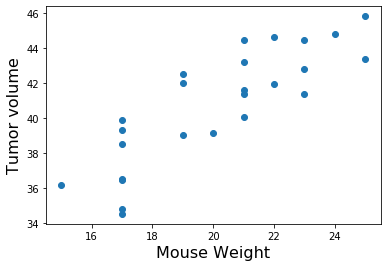

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_scatter= tumors_dataframe[tumors_dataframe["Regimen"]== "Capomulin"]

mouse_weight = capo_scatter['Weight']

mouse_weight= np.array(mouse_weight)

mouse_tumor = capo_scatter['Prom_Tumor']

mouse_tumor= np.array(mouse_tumor)

print(mouse_weight)
print(mouse_tumor)

plt.scatter(mouse_weight, mouse_tumor)
plt.xlabel('Mouse Weight', fontsize=16)
plt.ylabel('Tumor volume', fontsize=16)
plt.show()


## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=np.corrcoef(mouse_weight, mouse_tumor)[0, 1]
print(corr)



0.8419363424694719


In [43]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  

def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "b", 
               marker = "*", s = 40) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('Weight') 
    plt.ylabel('Tumor Volume') 
  
    # function to show plot 
    plt.show() 
  


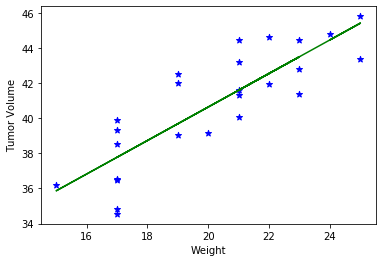

In [44]:

x = mouse_weight
y = mouse_tumor

# estimating coefficients 
b = estimate_coef(x, y) 


# plotting regression line 
plot_regression_line(x, y, b) 